In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics, tree
from sklearn.datasets import make_blobs, make_circles
from sklearn.datasets import load_iris, make_classification, fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.svm import SVC

Text(0, 0.5, 'X2')

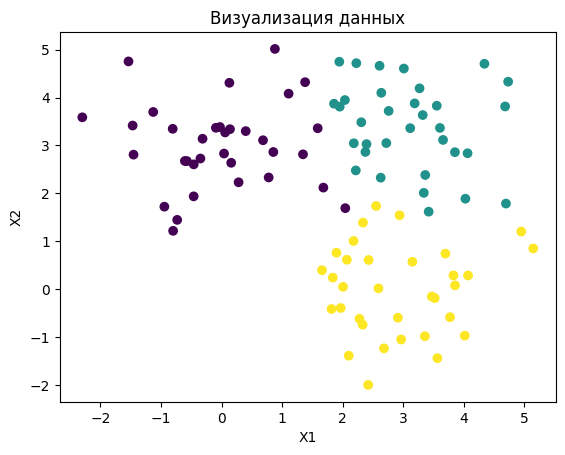

In [5]:
X, y = make_blobs(n_samples=100, centers=[(0,3),(3,3),(3,0)], 
                                      n_features=2, random_state=np.random.seed(0),
                                      cluster_std=(0.9,0.9,0.9))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

In [9]:
depth=4
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth, 
                                  random_state=np.random.seed(0))
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

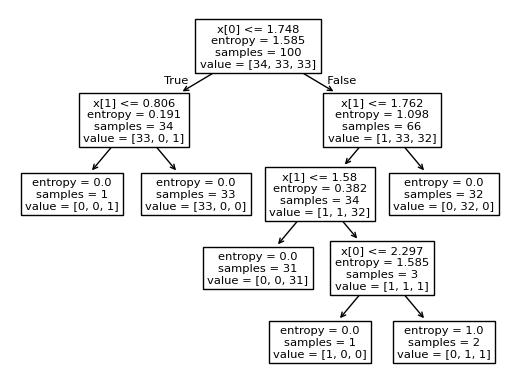

In [16]:
tree.plot_tree(clf_tree) 
plt.show()

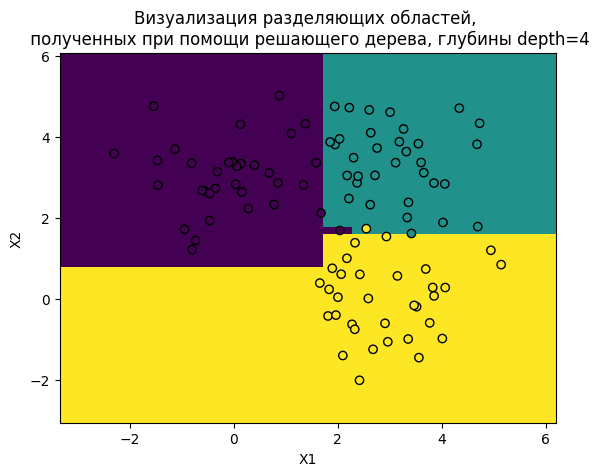

In [11]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [19]:
y_pred = clf_tree.predict(X)
print(metrics.confusion_matrix(y, y_pred))
print('Accuracy =', metrics.accuracy_score(y, y_pred))
print('F1_score =', metrics.f1_score(y, y_pred, average='micro'))

[[34  0  0]
 [ 0 33  0]
 [ 0  1 32]]
Accuracy = 0.99
F1_score = 0.99


In [29]:
depth=3
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=np.random.seed(0))
reg_tree.fit(X.reshape(-1, 1), y)

DecisionTreeRegressor(max_depth=3)

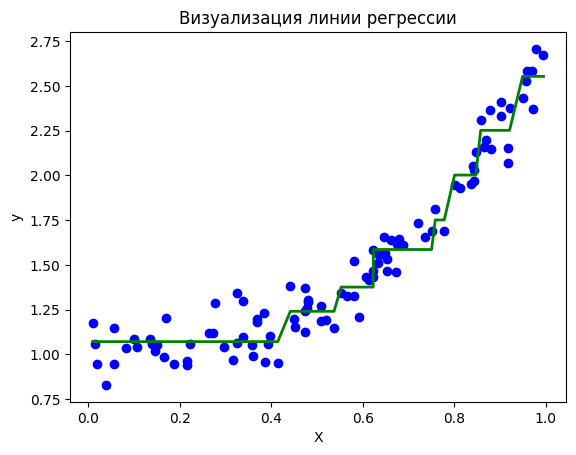

In [33]:
y_pred_reg = reg_tree.predict(X.reshape(-1,1))

plt.scatter(X.reshape(-1,1), y, c="b")

plt.plot(X.reshape(-1,1), y_pred_reg, "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y');

In [34]:
print('r2= ', metrics.r2_score(y, y_pred_reg))
print('MSE= ', metrics.mean_squared_error(y, y_pred_reg))

r2=  0.9599226323448554
MSE=  0.009699218562651624


# Задания для самостоятельного выполнения


## Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.

Text(0, 0.5, 'X2')

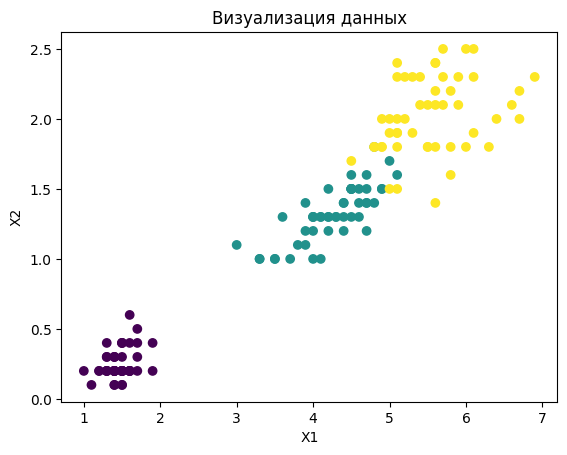

In [63]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

## Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.

In [64]:
model = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=42)
model.fit(X, y)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

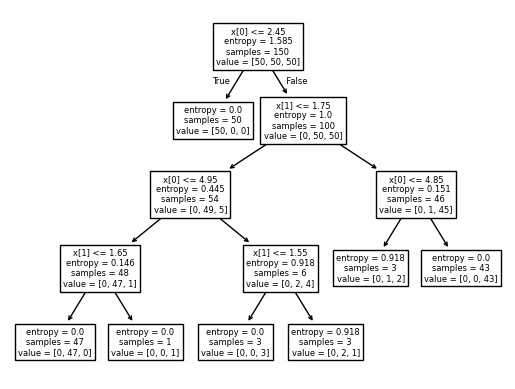

In [65]:
tree.plot_tree(model) 
plt.show()

## Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области.

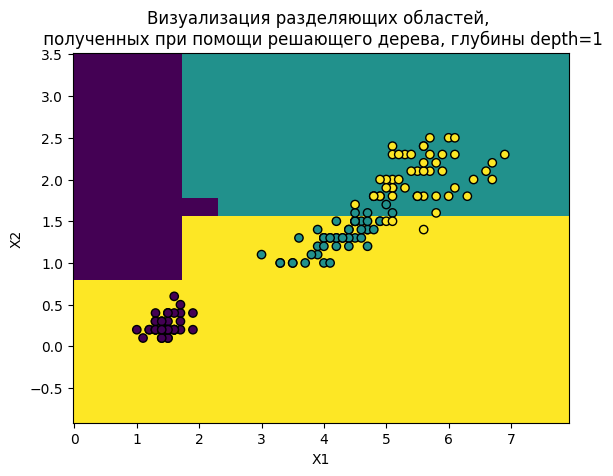

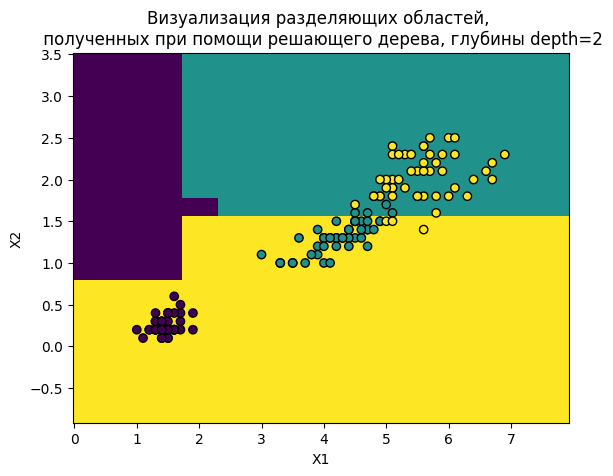

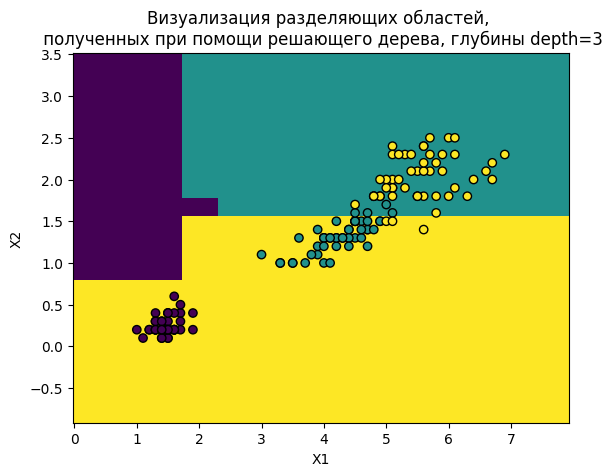

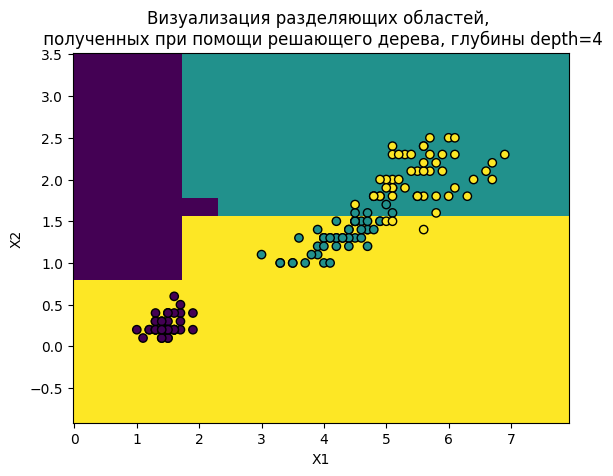

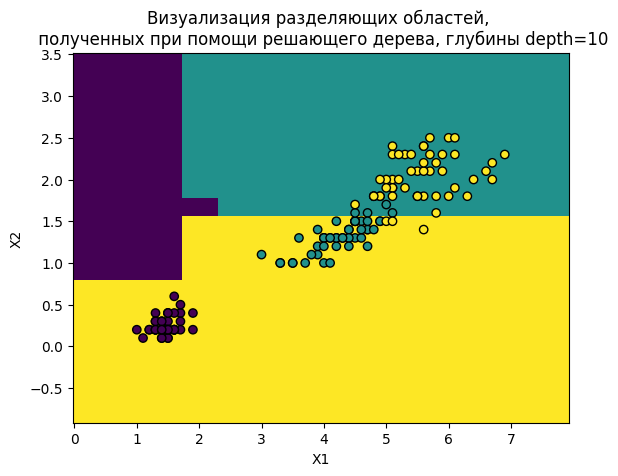

In [67]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)
depths = [1, 2, 3, 4, 10]
for i, depth in enumerate(depths):
    model = DecisionTreeClassifier(max_depth=depth, criterion='entropy', random_state=42)
    model.fit(X, y)
    y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
    plt.pcolormesh(X0_grid, X1_grid, y_predict)
    plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
    plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

## Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.

In [50]:
depths = [1, 2, 3, 4, 10]

for i, depth in enumerate(depths):
    model = DecisionTreeClassifier(max_depth=depth, criterion='entropy', random_state=42)
    model.fit(X, y)
    
    y_pred = model.predict(X)
    print('Depth = ', depth)
    print(metrics.confusion_matrix(y, y_pred))
    print('Accuracy =', metrics.accuracy_score(y, y_pred))
    print('F1_score =', metrics.f1_score(y, y_pred, average='micro'))

Depth =  1
[[50  0  0]
 [ 0 50  0]
 [ 0 50  0]]
Accuracy = 0.6666666666666666
F1_score = 0.6666666666666666
Depth =  2
[[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]
Accuracy = 0.96
F1_score = 0.96
Depth =  3
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
Accuracy = 0.9733333333333334
F1_score = 0.9733333333333334
Depth =  4
[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]
Accuracy = 0.9866666666666667
F1_score = 0.9866666666666667
Depth =  10
[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]
Accuracy = 0.9933333333333333
F1_score = 0.9933333333333333


## Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.

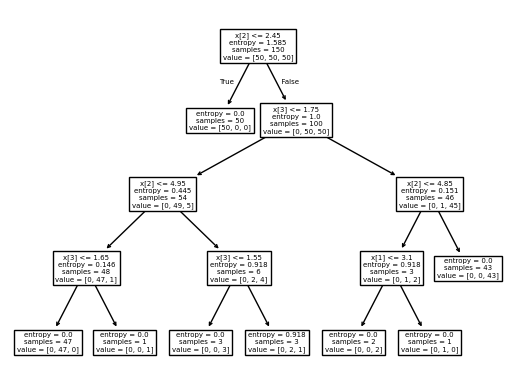

Depth =  4
[[50  0  0]
 [ 0 50  0]
 [ 0  1 49]]
Accuracy = 0.9933333333333333
F1_score = 0.9933333333333333


In [56]:
iris = load_iris()
X = iris.data
y = iris.target

model = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=42)
model.fit(X, y)
tree.plot_tree(model) 
plt.show()
y_pred = model.predict(X)
print('Depth = ', 4)
print(metrics.confusion_matrix(y, y_pred))
print('Accuracy =', metrics.accuracy_score(y, y_pred))
print('F1_score =', metrics.f1_score(y, y_pred, average='micro'))

## Загрузите встроенные данные sklearn.datasets.california_housing, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.

In [122]:
california = fetch_california_housing()
X = california.data[:, 3].reshape(-1, 1)
y = california.target 

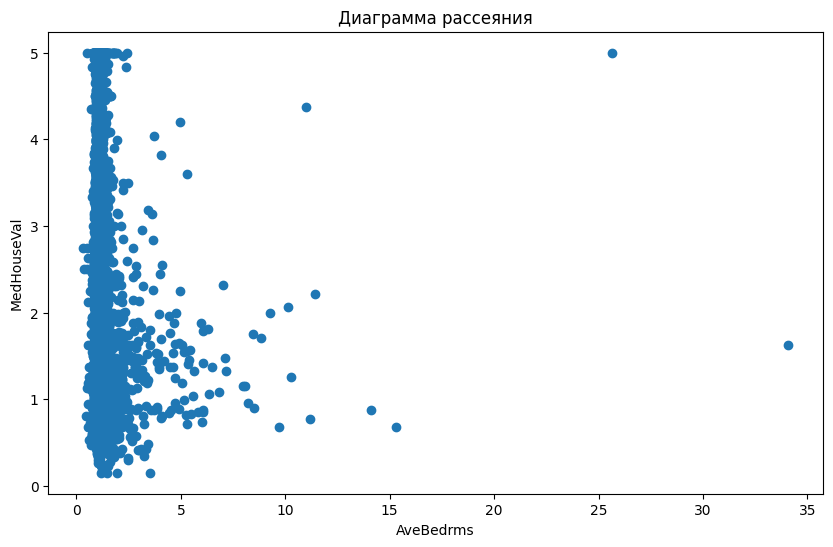

In [120]:

plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.xlabel('AveBedrms')
plt.ylabel('MedHouseVal')
plt.title('Диаграмма рассеяния')
plt.show()

## Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.

In [123]:
reg_tree = DecisionTreeRegressor(max_depth =3, random_state=0)
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=0)

## Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.

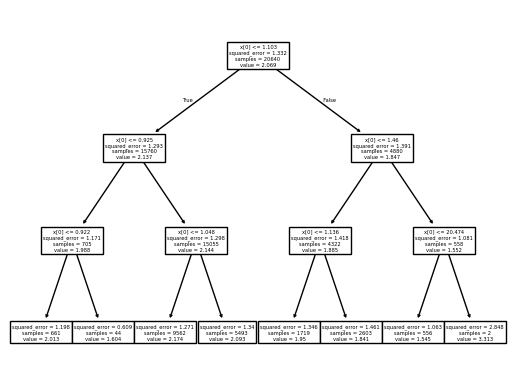

In [124]:
tree.plot_tree(reg_tree)
plt.show()

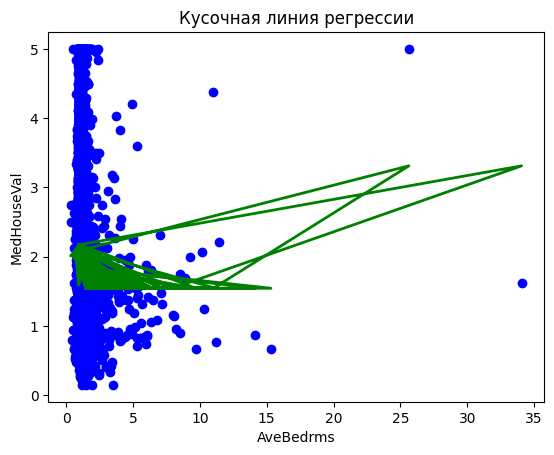

In [125]:
y_pred_reg = reg_tree.predict(X)
plt.scatter(X, y, c="b")
plt.plot(X, y_pred_reg, "g", lw=2)
plt.xlabel('AveBedrms')
plt.ylabel('MedHouseVal')
plt.title('Кусочная линия регрессии')
plt.show()

## Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [126]:
print('r2= ', metrics.r2_score(y, y_pred_reg))
print('MSE= ', metrics.mean_squared_error(y, y_pred_reg))

r2=  0.015791829999576845
MSE=  1.31052268410703


## Загрузите весь датасет fetch_california_housing. Обучите ту же модель. Визуализируйте соответствующий граф дерева решений и оцените качество работы модели.

In [127]:
california = fetch_california_housing()
X = california.data
y = california.target 

In [128]:
reg_tree = DecisionTreeRegressor(max_depth =3, random_state=0)
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=0)

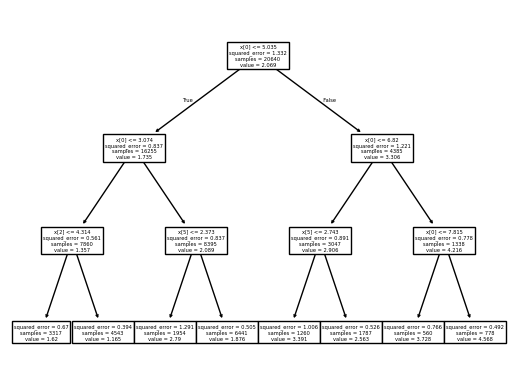

In [129]:
tree.plot_tree(reg_tree)
plt.show()

In [130]:
y_pred_reg = reg_tree.predict(X)
print('r2= ', metrics.r2_score(y, y_pred_reg))
print('MSE= ', metrics.mean_squared_error(y, y_pred_reg))

r2=  0.5341034720373743
MSE=  0.6203646616157066
